In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import chi2
import seaborn as sns

In [125]:
data = pd.read_csv("./cojo-robustness/data/test_diff_r.tsv", sep='\t')
data = data.round({'r': 3})
data["lg_p1"] = -np.log10(data["p1"])
data["lg_p1_tool"] = -np.log10(data["p1_tool"])
data["lg_p2"] = -np.log10(data["p2"])
data["lg_p2_tool"] = -np.log10(data["p2_tool"])
data.head()

,r,beta1,se1,p1,beta2,se2,p2,beta1_tool,se1_tool,p1_tool,beta2_tool,se2_tool,p2_tool,lg_p1,lg_p1_tool,lg_p2,lg_p2_tool
0,0.2,0.025102,0.003229,7.680654e-15,0.004857,0.003229,0.132569,0.025103,0.003224,6.964350e-15,0.005072,0.003225,0.115835,14.114602,14.157119,0.877558,0.936160
1,0.2,0.017556,0.003224,5.154231e-08,-0.005436,0.003224,0.091761,0.017440,0.003209,5.510100e-08,-0.005206,0.003222,0.106200,7.287836,7.258841,1.037342,0.973875
2,0.2,0.015808,0.003215,8.777082e-07,-0.004952,0.003215,0.123442,0.015719,0.003209,9.636440e-07,-0.004764,0.003208,0.137468,6.056650,6.016083,0.908538,0.861798
3,0.2,0.015463,0.003222,1.591230e-06,-0.000911,0.003222,0.777427,0.015413,0.003213,1.607360e-06,-0.000709,0.003215,0.825569,5.798267,5.793887,0.109341,0.083247
4,0.2,0.016015,0.003228,7.005194e-07,-0.004661,0.003228,0.148716,0.015892,0.003218,7.891640e-07,-0.004389,0.003218,0.172621,6.154580,6.102833,0.827642,0.762906


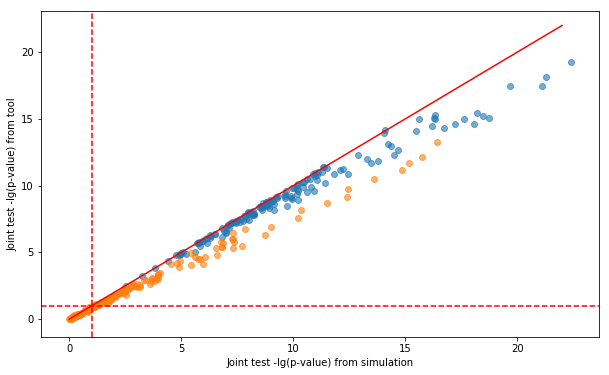

In [137]:
fig, ax = plt.subplots(1, figsize=(10, 6))

x = np.linspace(-0.0, 22, 1000)
ax.plot(x, x, color='red')

model = smf.ols("lg_p1_tool ~ lg_p1", data=data).fit()
print(model)
# ax.scatter(x=data["p1"], y=data["p1_tool"])
# ax.scatter(x=data["p1"], y=data["p2_tool"])

ax.scatter(x=data["lg_p1"], y=data["lg_p1_tool"], alpha=0.6)
ax.scatter(x=data["lg_p2"], y=data["lg_p2_tool"], alpha=0.6)

ax.set_xlabel("Joint test -lg(p-value) from simulation")
ax.set_ylabel("Joint test -lg(p-value) from tool")

ax.axvline(x=1.0, color='red', linestyle='--')
ax.axhline(y=1.0, color='red', linestyle='--')

plt.savefig("/home/aleksandr/HiddenDesktop/Bachelor's work/cojo-robustness/out/joint_tool_vs_sim.png", dpi=300)
plt.show()
plt.close()

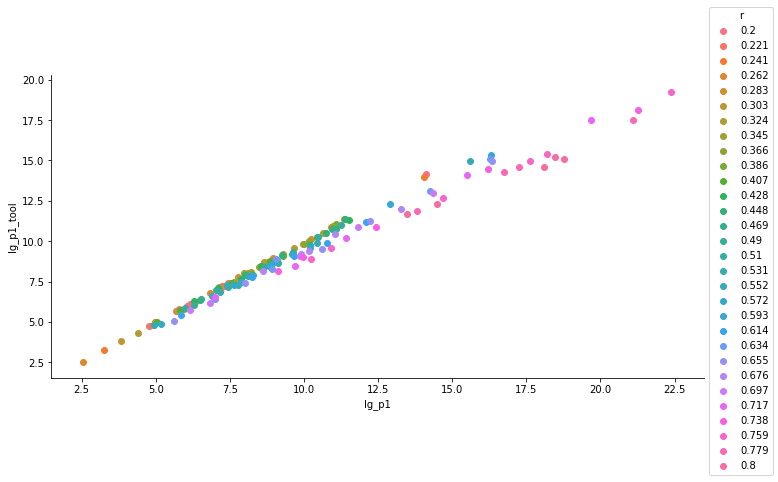

In [127]:
fg = sns.FacetGrid(data=data, hue='r', aspect=2, size=5)
fg.map(plt.scatter, 'p1', 'p1_tool').add_legend()
plt.show()
plt.close()

In [229]:
implementation_testing = pd.read_csv("./cojo-robustness/data/testing_joint_implementation.tsv", sep='\t')
implementation_testing.head()

,beta1_multiple,beta1_sim,beta1_single,beta1_tool,beta2_multiple,beta2_sim,beta2_single,beta2_tool,p1_multiple,p1_sim,...,pJ_sim,pJ_tool,se1_multiple,se1_sim,se1_single,se1_tool,se2_multiple,se2_sim,se2_single,se2_tool
0,0.263958,0.263982,0.174385,0.247730,-0.149299,-0.149801,0.008088,-0.130536,5.478431e-107,6.124066e-110,...,1.192121e-108,-1,0.011869,0.011850,0.009587,0.011756,0.011832,0.011850,0.009714,0.011732
1,0.250634,0.250717,0.168010,0.236652,-0.137938,-0.139418,0.009313,-0.121765,2.683727e-94,2.613240e-97,...,4.310205e-96,-1,0.012037,0.011976,0.009754,0.011924,0.011921,0.011976,0.009802,0.011820
2,0.249680,0.249620,0.170014,0.232683,-0.132797,-0.132229,0.018050,-0.112629,1.027177e-92,2.977970e-94,...,1.353209e-93,-1,0.012097,0.012120,0.009717,0.011883,0.012140,0.012120,0.009897,0.011938
3,0.261125,0.261054,0.177524,0.243919,-0.139754,-0.139045,0.017779,-0.119377,1.156947e-106,1.082395e-108,...,5.076579e-108,-1,0.011760,0.011787,0.009467,0.011604,0.011810,0.011787,0.009671,0.011667
4,0.273025,0.272943,0.183761,0.255264,-0.147406,-0.146618,0.019401,-0.126511,4.769100e-111,3.039896e-113,...,1.110504e-112,-1,0.012040,0.012069,0.009627,0.011898,0.012094,0.012069,0.009843,0.011965


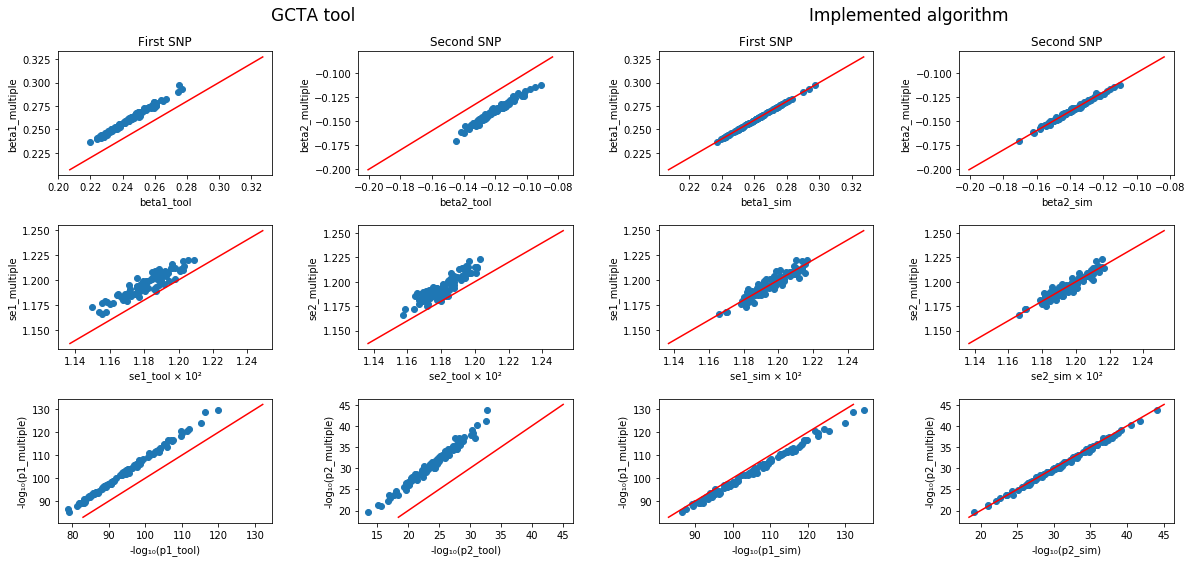

In [236]:
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(20, 10))

fig.subplots_adjust(top=0.78, wspace=0.4, hspace=0.4)

axes[0][0].set_title("First SNP")
axes[0][1].set_title("Second SNP")
axes[0][2].set_title("First SNP")
axes[0][3].set_title("Second SNP")

plt.figtext(0.3025, 0.83, "GCTA tool", va="center", ha="center", size=17)
axes[0][0].scatter(y=implementation_testing["beta1_multiple"], x=implementation_testing["beta1_tool"])
x = np.linspace(axes[0][0].get_ylim()[0], axes[0][0].get_ylim()[1], 100)
axes[0][0].plot(x, x, color='red')
axes[0][0].set_ylabel("beta1_multiple")
axes[0][0].set_xlabel("beta1_tool")
axes[0][1].scatter(y=implementation_testing["beta2_multiple"], x=implementation_testing["beta2_tool"])
x = np.linspace(axes[0][1].get_ylim()[0], axes[0][1].get_ylim()[1], 100)
axes[0][1].plot(x, x, color='red')
axes[0][1].set_ylabel("beta2_multiple")
axes[0][1].set_xlabel("beta2_tool")
axes[1][0].scatter(y=implementation_testing["se1_multiple"] * 100, x=implementation_testing["se1_tool"] * 100)
x = np.linspace(axes[1][0].get_ylim()[0], axes[1][0].get_ylim()[1], 100)
axes[1][0].plot(x, x, color='red')
axes[1][0].set_ylabel("se1_multiple")
axes[1][0].set_xlabel("se1_tool \u2A2F 10\u00B2")
axes[1][1].scatter(y=implementation_testing["se2_multiple"] * 100, x=implementation_testing["se2_tool"] * 100)
x = np.linspace(axes[1][1].get_ylim()[0], axes[1][1].get_ylim()[1], 100)
axes[1][1].plot(x, x, color='red')
axes[1][1].set_ylabel("se2_multiple")
axes[1][1].set_xlabel("se2_tool \u2A2F 10\u00B2")
axes[2][0].scatter(y=-np.log10(implementation_testing["p1_multiple"]), x=-np.log10(implementation_testing["p1_tool"]))
x = np.linspace(axes[2][0].get_ylim()[0], axes[2][0].get_ylim()[1], 100)
axes[2][0].plot(x, x, color='red')
axes[2][0].set_ylabel("-log\u2081\u2080(p1_multiple)")
axes[2][0].set_xlabel("-log\u2081\u2080(p1_tool)")
axes[2][1].scatter(y=-np.log10(implementation_testing["p2_multiple"]), x=-np.log10(implementation_testing["p2_tool"]))
x = np.linspace(axes[2][1].get_ylim()[0], axes[2][1].get_ylim()[1], 100)
axes[2][1].plot(x, x, color='red')
axes[2][1].set_ylabel("-log\u2081\u2080(p2_multiple)")
axes[2][1].set_xlabel("-log\u2081\u2080(p2_tool)")

plt.figtext(0.716, 0.83, "Implemented algorithm", va="center", ha="center", size=17)
axes[0][2].scatter(y=implementation_testing["beta1_multiple"], x=implementation_testing["beta1_sim"])
x = np.linspace(axes[0][2].get_ylim()[0], axes[0][2].get_ylim()[1], 100)
axes[0][2].plot(x, x, color='red')
axes[0][2].set_ylabel("beta1_multiple")
axes[0][2].set_xlabel("beta1_sim")
axes[0][3].scatter(y=implementation_testing["beta2_multiple"], x=implementation_testing["beta2_sim"])
x = np.linspace(axes[0][3].get_ylim()[0], axes[0][3].get_ylim()[1], 100)
axes[0][3].plot(x, x, color='red')
axes[0][3].set_ylabel("beta2_multiple")
axes[0][3].set_xlabel("beta2_sim")
axes[1][2].scatter(y=implementation_testing["se1_multiple"] * 100, x=implementation_testing["se1_sim"] * 100)
x = np.linspace(axes[1][2].get_ylim()[0], axes[1][2].get_ylim()[1], 100)
axes[1][2].plot(x, x, color='red')
axes[1][2].set_ylabel("se1_multiple")
axes[1][2].set_xlabel("se1_sim \u2A2F 10\u00B2")
axes[1][3].scatter(y=implementation_testing["se2_multiple"] * 100, x=implementation_testing["se2_sim"] * 100)
x = np.linspace(axes[1][3].get_ylim()[0], axes[1][3].get_ylim()[1], 100)
axes[1][3].plot(x, x, color='red')
axes[1][3].set_ylabel("se2_multiple")
axes[1][3].set_xlabel("se2_sim \u2A2F 10\u00B2")
axes[2][2].scatter(y=-np.log10(implementation_testing["p1_multiple"]), x=-np.log10(implementation_testing["p1_sim"]))
x = np.linspace(axes[2][2].get_ylim()[0], axes[2][2].get_ylim()[1], 100)
axes[2][2].plot(x, x, color='red')
axes[2][2].set_ylabel("-log\u2081\u2080(p1_multiple)")
axes[2][2].set_xlabel("-log\u2081\u2080(p1_sim)")
axes[2][3].scatter(y=-np.log10(implementation_testing["p2_multiple"]), x=-np.log10(implementation_testing["p2_sim"]))
x = np.linspace(axes[2][3].get_ylim()[0], axes[2][3].get_ylim()[1], 100)
axes[2][3].plot(x, x, color='red')
axes[2][3].set_ylabel("-log\u2081\u2080(p2_multiple)")
axes[2][3].set_xlabel("-log\u2081\u2080(p2_sim)")

# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=3.0)
plt.savefig("/home/aleksandr/HiddenDesktop/Bachelor's work/cojo-robustness/out/implementation_testing.png", dpi=300)
plt.show()
plt.close()

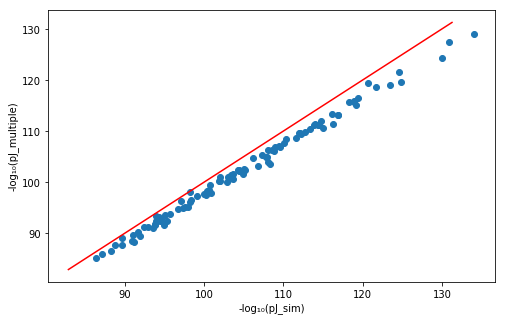

In [237]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(y=-np.log10(implementation_testing["pJ_multiple"]), x=-np.log10(implementation_testing["pJ_sim"]))

x = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100)
ax.plot(x, x, color='red')
ax.set_xlabel("-log\u2081\u2080(pJ_sim)")
ax.set_ylabel("-log\u2081\u2080(pJ_multiple)")

plt.savefig("/home/aleksandr/HiddenDesktop/Bachelor's work/cojo-robustness/out/implementation_testing_pjoint.png", dpi=300)
plt.show()
plt.close()